In [84]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_wine
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [85]:
X, y = load_wine(return_X_y=True)

In [86]:
features = [
    'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue',
    'od280/od315_of_diluted_wines', 'proline'
]

X = pd.DataFrame(data=X, columns=features)
y = pd.DataFrame(data=y, columns=['classes'])
X.head()
y.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,classes
0,0
1,0
2,0
3,0
4,0


In [87]:
y.classes.value_counts()

X.shape, y.shape

1    71
0    59
2    48
Name: classes, dtype: int64

((178, 13), (178, 1))

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((133, 13), (133, 1), (45, 13), (45, 1))

In [89]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [90]:
params = {
    'max_depth': 6,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 3,
    'n_gpus': 0
}

In [91]:
bst = xgb.train(params, dtrain)

In [92]:
pred = bst.predict(dtest)

In [93]:
pred

array([0., 1., 0., 0., 1., 0., 0., 1., 1., 2., 1., 1., 2., 2., 0., 0., 1.,
       0., 0., 2., 2., 2., 0., 0., 1., 1., 0., 1., 0., 1., 0., 2., 1., 2.,
       2., 1., 0., 2., 2., 1., 2., 1., 0., 1., 1.], dtype=float32)

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[15,  0,  0],
       [ 1, 17,  0],
       [ 0,  0, 12]])

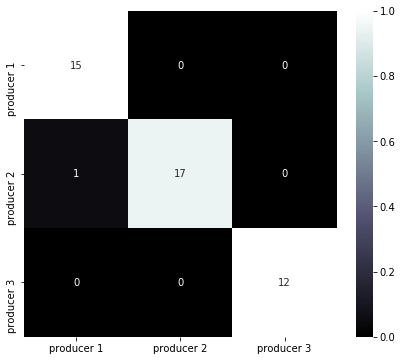

In [96]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

plot_confusion_matrix(cm, ['producer 1', 'producer 2', 'producer 3'])

## Multilabel sample

In [97]:
data = pd.read_csv('datasets/Frogs_MFCCs.csv')
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [98]:
data['Family'].value_counts()
data['Genus'].value_counts()
data['Species'].value_counts(), len(data['Species'].value_counts()),

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

(AdenomeraHylaedactylus    3478
 HypsiboasCordobae         1121
 AdenomeraAndre             672
 Ameeregatrivittata         542
 HypsiboasCinerascens       472
 HylaMinuta                 310
 LeptodactylusFuscus        270
 ScinaxRuber                148
 OsteocephalusOophagus      114
 Rhinellagranulosa           68
 Name: Species, dtype: int64, 10)

In [99]:
data.iloc[:, :-4].head()
data.iloc[:, -2].head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


0    AdenomeraAndre
1    AdenomeraAndre
2    AdenomeraAndre
3    AdenomeraAndre
4    AdenomeraAndre
Name: Species, dtype: object

In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(data.iloc[:, -2])
x = data.iloc[:, :-4] 

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((5396, 22), (5396,), (1799, 22), (1799,))

In [101]:
data.iloc[:, -2].value_counts()

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

In [102]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [103]:
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 10,
    'n_gpus': 0
}

In [104]:
bst = xgb.train(params, dtrain)

In [105]:
pred = bst.predict(dtest)

In [106]:
pred.sum()
y_test.sum(), len(y_test)

4248.0

(4315, 1799)

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, target_names=le.classes_))

                        precision    recall  f1-score   support

        AdenomeraAndre       0.95      0.93      0.94       168
AdenomeraHylaedactylus       0.98      1.00      0.99       870
    Ameeregatrivittata       0.93      0.95      0.94       136
            HylaMinuta       0.82      0.77      0.79        78
  HypsiboasCinerascens       0.93      0.98      0.95       118
     HypsiboasCordobae       0.96      0.96      0.96       280
   LeptodactylusFuscus       0.93      0.93      0.93        67
 OsteocephalusOophagus       0.64      0.64      0.64        28
     Rhinellagranulosa       0.93      0.76      0.84        17
           ScinaxRuber       0.90      0.70      0.79        37

             micro avg       0.95      0.95      0.95      1799
             macro avg       0.90      0.86      0.88      1799
          weighted avg       0.95      0.95      0.95      1799



In [108]:
frog_cm = confusion_matrix(y_test, pred)

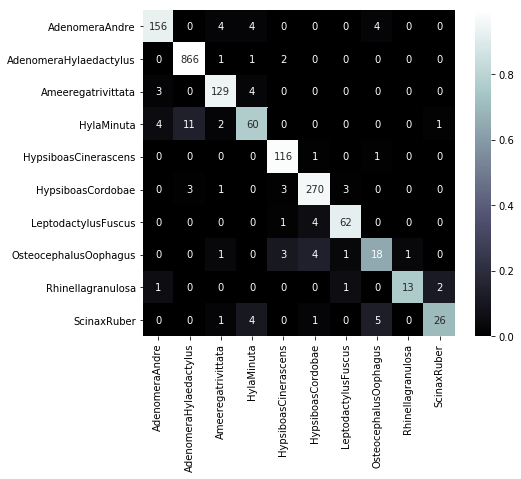

In [109]:
plot_confusion_matrix(frog_cm, classes=le.classes_)